<a href="https://colab.research.google.com/github/TomerShimshi/tensorflow_CNN/blob/main/CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import zipfile
from google.colab.patches import cv2_imshow
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
tf.__version__

'2.8.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


loading the images

In [ ]:
path = '/content/drive/MyDrive/Computer Vision Masterclass/Datasets/homer_bart_2.zip'
zip_obj = zipfile.ZipFile(file= path, mode= 'r')
zip_obj.extractall('./')
zip_obj.close()

now for the train and test set

In [ ]:
trainning_generator = ImageDataGenerator(rescale=1./255, rotation_range= 7 , horizontal_flip= True, zoom_range= 0.2)

In [ ]:
train_dataset = trainning_generator.flow_from_directory(directory= '/content/homer_bart_2/training_set', target_size=(64,64),
                                                        batch_size=8, class_mode='categorical', shuffle= True)

Found 215 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255)

In [ ]:

test_dataset = test_generator.flow_from_directory(directory= '/content/homer_bart_2/test_set', target_size=(64,64),
                                                        batch_size=1, class_mode='categorical', shuffle= False)

Found 54 images belonging to 2 classes.


Build and train the net

In [ ]:
net = Sequential()
net.add(Conv2D(filters= 32, kernel_size=(3,3), activation='relu',input_shape = (64,64,3)))
net.add(MaxPool2D(pool_size=(2,2)))

net.add(Conv2D(filters= 32, kernel_size=(3,3), activation='relu'))
net.add(MaxPool2D(pool_size=(2,2)))

net.add(Conv2D(filters= 32, kernel_size=(3,3), activation='relu'))
net.add(MaxPool2D(pool_size=(2,2)))

net.add(Flatten())

net.add(Dense(units=577,activation='relu'))
net.add(tf.keras.layers.Dropout(.2, input_shape=(2,)))
net.add(Dense(units=577,activation='relu'))
net.add(Dense(units=2,activation='softmax'))
net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)        

In [ ]:
net.compile(optimizer='Adam', loss= tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
history= net.fit_generator( train_dataset,epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


27/27 [==============================] - 2s 39ms/step - loss: 0.6794 - accuracy: 0.5953
Epoch 2/50
27/27 [==============================] - 1s 39ms/step - loss: 0.5981 - accuracy: 0.6651
Epoch 3/50
27/27 [==============================] - 1s 40ms/step - loss: 0.5343 - accuracy: 0.7256
Epoch 4/50
27/27 [==============================] - 1s 39ms/step - loss: 0.5031 - accuracy: 0.7581
Epoch 5/50
27/27 [==============================] - 1s 40ms/step - loss: 0.4403 - accuracy: 0.7814
Epoch 6/50
27/27 [==============================] - 1s 40ms/step - loss: 0.3461 - accuracy: 0.8558
Epoch 7/50
27/27 [==============================] - 1s 40ms/step - loss: 0.3988 - accuracy: 0.8186
Epoch 8/50
27/27 [==============================] - 1s 39ms/step - loss: 0.3139 - accuracy: 0.8419
Epoch 9/50
27/27 [==============================] - 1s 39ms/step - loss: 0.3401 - accuracy: 0.8512
Epoch 10/50
27/27 [==============================] - 1s 40ms/step - loss: 0.2727 - accuracy: 0.8744
Epoch 11/50
27/27 [=

now for the test

In [ ]:
predictions = net.predict(test_dataset)

In [ ]:
predictions = np.argmax(predictions,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes,predictions)

0.8888888888888888

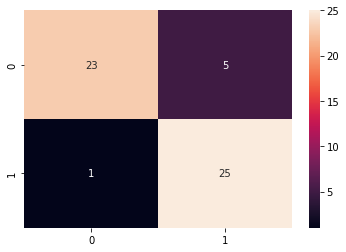

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes,predictions)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88        28
           1       0.83      0.96      0.89        26

    accuracy                           0.89        54
   macro avg       0.90      0.89      0.89        54
weighted avg       0.90      0.89      0.89        54



Now To Save The Model


In [ ]:
mode_json= net.to_json()
with open('net.json','w') as json_file:
  json_file.write(mode_json)

In [ ]:
from keras.models import save_model
net_saves = save_model(net,'/content/weights.hdf5')

Load the model

In [ ]:
with open ('net.json','r') as json_file:
  json_saved_model = json_file.read()



In [ ]:
net_loaded = tf.keras.models.model_from_json(json_saved_model)
net_loaded.load_weights('weights.hdf5')
net_loaded.compile(optimizer='Adam', loss= tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'] )

In [ ]:
#net_loaded.summary()

classify a single image

In [ ]:
image = cv2.imread('/content/homer_bart_2/test_set/homer/homer28.bmp')


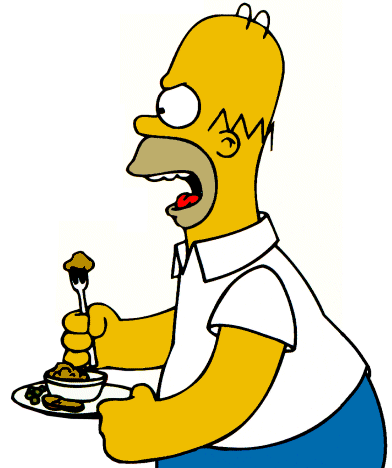

In [ ]:
image.shape
cv2_imshow(image)

In [ ]:
image = cv2.resize(image,(64,64))

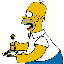

In [ ]:

cv2_imshow(image)

In [ ]:
image= image/255

In [ ]:
image = image.reshape(-1,64,64,3)

find the result for it

In [ ]:
result = net_loaded.predict(image)
result

array([[8.5624645e-04, 9.9914372e-01]], dtype=float32)

In [ ]:
result = np.argmax(result)

In [ ]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
if result == 0:
  print('bart')
else:
  print('Homer')

Homer
